## SeisNoise Implementation for OOI Cabled Array Data

### Standard SeisNoise code adapted to save cross correlation files of multiple years between two specific stations


In [1]:
using SeisNoise, SeisIO, Plots, HDF5

┌ Warning: Error requiring `HDF5` from `Plots`
│   exception = (LoadError("/home/seismic/.julia/packages/Plots/1KWPG/src/backends/hdf5.jl", 36, UndefVarError(:Group)), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x00007f3b8875b47f, Ptr{Nothing} @0x00007f3b887fa70c, Ptr{Nothing} @0x00007f3b887fae75, Ptr{Nothing} @0x00007f3b887fa90d, Ptr{Nothing} @0x00007f3b887fb6d1, Ptr{Nothing} @0x00007f3b887fc2f7, Base.InterpreterIP in top-level CodeInfo for Plots._hdf5_implementation at statement 4, Ptr{Nothing} @0x00007f3b888197a3, Ptr{Nothing} @0x00007f3b88819e3c, Ptr{Nothing} @0x00007f3b888199e4, Ptr{Nothing} @0x00007f3b888199e4, Ptr{Nothing} @0x00007f3b8881b629, Ptr{Nothing} @0x00007f3b6834e83a, Ptr{Nothing} @0x00007f3b887dbe09, Ptr{Nothing} @0x00007f3b6843e35a, Ptr{Nothing} @0x00007f3b67f5bc15, Ptr{Nothing} @0x00007f3b887dbe09, Ptr{Nothing} @0x00007f3b887ec5d6, Ptr{Nothing} @0x00007f3b65e7fc6a, Ptr{Nothing} @0x00007f3b887dbe09, Ptr{Nothing} @0x00007f3b887fae95, Ptr{Nothing} @0x00007f3b

In [2]:
fs = 40.0 # sampling frequency in Hz
freqmin,freqmax = 0.1,16.0 # min and max frequencies
cc_step, cc_len = 450, 1800 # corrleation step and length in S
maxlag = 60. # maximum lag time in correlation

60.0

In [3]:
for j in 2015:2020
    if j==2020
        m=1
        k=365
    elseif j==2015
        m=63
        k=360
    elseif j==2016
        m=1
        k=366
    else
        m=1
        k=365
    end
        
        
    for i in m:k 

        if i<10
            a=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/00",string(i),"/HYS14.OO.",string(j),".00",string(i),".SHE")
            b=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/00",string(i),"/HYS14.OO.",string(j),".00",string(i),".SHN")
        elseif i>=10 && i<100
            a=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/0",string(i),"/HYS14.OO.",string(j),".0",string(i),".SHE")
            b=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/0",string(i),"/HYS14.OO.",string(j),".0",string(i),".SHN")
        elseif i>=100 && i<1000
            a=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/",string(i),"/HYS14.OO.",string(j),".",string(i),".SHE")
            b=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/",string(i),"/HYS14.OO.",string(j),".",string(i),".SHN")
        end

        try 
            S1=read_data(a) 
            S2=read_data(b)
            S1.fs=[40.0]
            S2.fs=[40.0]
        #if length(S1.x[])!=3456000 || length(S2.x[])!=3456000
        #    continue
        #end
                
        #if S1.fs<fs || S2.fs < fs
        #    println("what is wrong with this sampling rate"*str(S1.fs)*" "*str(S2.fs))
        #    continue
        #end
        
            process_raw!(S1,fs)
            process_raw!(S2,fs)
        

            R = RawData.([S1,S2],cc_len,cc_step)
            detrend!.(R)
            taper!.(R)
            #bandpass!.(R,freqmin,freqmax,zerophase=true)
            FFT = rfft.(R)
            whiten!.(FFT,freqmin,freqmax)
            C = correlate(FFT[1],FFT[2],maxlag)
            save_corr(C,"/data/wsd01/corrdata/raw/")
 
        catch; 
            println("cannot process "*a) 
               
        end
    end
end


cannot process /data/wsd01/OOI-Data/HYS14/2015/066/HYS14.OO.2015.066.SHE
cannot process /data/wsd01/OOI-Data/HYS14/2015/161/HYS14.OO.2015.161.SHE
cannot process /data/wsd01/OOI-Data/HYS14/2015/162/HYS14.OO.2015.162.SHE
cannot process /data/wsd01/OOI-Data/HYS14/2015/165/HYS14.OO.2015.165.SHE
cannot process /data/wsd01/OOI-Data/HYS14/2015/166/HYS14.OO.2015.166.SHE
cannot process /data/wsd01/OOI-Data/HYS14/2016/285/HYS14.OO.2016.285.SHE
cannot process /data/wsd01/OOI-Data/HYS14/2017/008/HYS14.OO.2017.008.SHE
cannot process /data/wsd01/OOI-Data/HYS14/2017/165/HYS14.OO.2017.165.SHE
cannot process /data/wsd01/OOI-Data/HYS14/2017/193/HYS14.OO.2017.193.SHE
cannot process /data/wsd01/OOI-Data/HYS14/2017/281/HYS14.OO.2017.281.SHE
cannot process /data/wsd01/OOI-Data/HYS14/2017/318/HYS14.OO.2017.318.SHE
cannot process /data/wsd01/OOI-Data/HYS14/2018/070/HYS14.OO.2018.070.SHE
cannot process /data/wsd01/OOI-Data/HYS14/2018/235/HYS14.OO.2018.235.SHE
cannot process /data/wsd01/OOI-Data/HYS14/2018/241/

cannot process /data/wsd01/OOI-Data/HYS14/2020/291/HYS14.OO.2020.291.SHE
cannot process /data/wsd01/OOI-Data/HYS14/2020/292/HYS14.OO.2020.292.SHE
cannot process /data/wsd01/OOI-Data/HYS14/2020/293/HYS14.OO.2020.293.SHE
cannot process /data/wsd01/OOI-Data/HYS14/2020/294/HYS14.OO.2020.294.SHE
cannot process /data/wsd01/OOI-Data/HYS14/2020/295/HYS14.OO.2020.295.SHE
cannot process /data/wsd01/OOI-Data/HYS14/2020/296/HYS14.OO.2020.296.SHE
cannot process /data/wsd01/OOI-Data/HYS14/2020/297/HYS14.OO.2020.297.SHE
cannot process /data/wsd01/OOI-Data/HYS14/2020/298/HYS14.OO.2020.298.SHE
cannot process /data/wsd01/OOI-Data/HYS14/2020/299/HYS14.OO.2020.299.SHE
cannot process /data/wsd01/OOI-Data/HYS14/2020/300/HYS14.OO.2020.300.SHE
cannot process /data/wsd01/OOI-Data/HYS14/2020/301/HYS14.OO.2020.301.SHE
cannot process /data/wsd01/OOI-Data/HYS14/2020/302/HYS14.OO.2020.302.SHE
cannot process /data/wsd01/OOI-Data/HYS14/2020/303/HYS14.OO.2020.303.SHE
cannot process /data/wsd01/OOI-Data/HYS14/2020/304/

In [ ]:
readdir("/data/wsd01/OOI-Data/HYS14/2015/066/")

### standard seisnoise code for plotting cross correlation function for one day between two stations

In [ ]:
using SeisNoise, SeisIO, Plots
fs = 36. # sampling frequency in Hz
freqmin,freqmax = 0.1,9.0 # min and max frequencies
cc_step, cc_len = 450, 1800 # corrleation step and length in S
maxlag = 60. # maximum lag time in correlation

j=2015
i=63
        if i<10
            a=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/00",string(i),"/HYS14.OO.",string(j),".00",string(i),".SHE")
            b=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/00",string(i),"/HYS14.OO.",string(j),".00",string(i),".SHN")
        elseif i>=10 && i<100
            a=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/0",string(i),"/HYS14.OO.",string(j),".0",string(i),".SHE")
            b=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/0",string(i),"/HYS14.OO.",string(j),".0",string(i),".SHN")
        elseif i>=100 && i<1000
            a=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/",string(i),"/HYS14.OO.",string(j),".",string(i),".SHE")
            b=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/",string(i),"/HYS14.OO.",string(j),".",string(i),".SHN")
        end

        S1=read_data(a)
        S2=read_data(b)

        process_raw!(S1,fs)
        process_raw!(S2,fs)

        R = RawData.([S1,S2],cc_len,cc_step)
        detrend!.(R)
        taper!.(R)
        bandpass!.(R,freqmin,freqmax,zerophase=true)
        FFT = rfft.(R)
        whiten!.(FFT,freqmin,freqmax)
        C = correlate(FFT[1],FFT[2],maxlag)
        clean_up!(C,freqmin,freqmax)
        abs_max!(C)
        plot(C)


In [ ]:
using SeisNoise, SeisIO, Plots
fs = 40. # sampling frequency in Hz
freqmin,freqmax = 0.1,20 # min and max frequencies
cc_step, cc_len = 450, 1800 # corrleation step and length in S
maxlag = 60. # maximum lag time in correlation

j=2015
i=69
        if i<10
            a=string("/data/wsd01/OOI-Data/HYSB1/",string(j),"/00",string(i),"/HYSB1.OO.",string(j),".00",string(i),".SHZ")
            b=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/00",string(i),"/HYS14.OO.",string(j),".00",string(i),".SHZ")
        elseif i>=10 && i<100
            a=string("/data/wsd01/OOI-Data/HYSB1/",string(j),"/0",string(i),"/HYSB1.OO.",string(j),".0",string(i),".SHZ")
            b=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/0",string(i),"/HYS14.OO.",string(j),".0",string(i),".SHZ")
        elseif i>=100 && i<1000
            a=string("/data/wsd01/OOI-Data/HYSB1/",string(j),"/",string(i),"/HYSB1.OO.",string(j),".",string(i),".SHZ")
            b=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/",string(i),"/HYS14.OO.",string(j),".",string(i),".SHZ")
        end

S1=read_data(a)
S2=read_data(b)
S1.fs=[40.0]
S2.fs=[40.0]
S2

In [ ]:
S1.fs

In [ ]:
S2.fs

In [ ]:
process_raw!(S1,fs)
S1

In [ ]:
process_raw!(S2,fs)
S2[1].fs

In [ ]:
=[40.0]
S2

In [ ]:
S2.fs

### Save correlation matrix for one day -> debugging portal

In [ ]:
j=2017
i=287        
        if i<10
            a=string("/data/wsd01/OOI-Data/HYS12/",string(j),"/00",string(i),"/HYS12.OO.",string(j),".00",string(i),".SHE")
            b=string("/data/wsd01/OOI-Data/HYS12/",string(j),"/00",string(i),"/HYS12.OO.",string(j),".00",string(i),".SHN")
        elseif i>=10 && i<100
            a=string("/data/wsd01/OOI-Data/HYS12/",string(j),"/0",string(i),"/HYS12.OO.",string(j),".0",string(i),".SHE")
            b=string("/data/wsd01/OOI-Data/HYS12/",string(j),"/0",string(i),"/HYS12.OO.",string(j),".0",string(i),".SHN")
        elseif i>=100 && i<1000
            a=string("/data/wsd01/OOI-Data/HYS12/",string(j),"/",string(i),"/HYS12.OO.",string(j),".",string(i),".SHE")
            b=string("/data/wsd01/OOI-Data/HYS12/",string(j),"/",string(i),"/HYS12.OO.",string(j),".",string(i),".SHN")
        end

        y=0
        try S1=read_data(a) catch; y=1 end
        try S2=read_data(b) catch; y=1 end
        try process_raw!(S1,fs) catch; y=1 end
        try process_raw!(S2,fs) catch; y=1 end
        
        if y==0
            S1=read_data(a)
            S2=read_data(b)
            process_raw!(S1,fs)
            process_raw!(S2,fs)

            R = RawData.([S1,S2],cc_len,cc_step)
            detrend!.(R)
            taper!.(R)
            bandpass!.(R,freqmin,freqmax,zerophase=true)
            FFT = rfft.(R)
            whiten!.(FFT,freqmin,freqmax)
            C = correlate(FFT[1],FFT[2],maxlag)
            #save_corr(C,"/data/wsd01/corrdata/")
        end

### checks the available date entries withing the JLD file

In [ ]:
using JLD2
jldopen("/data/wsd01/corrdata/OO.HYS14..BHZ.OO.HYSB1..BHZ.jld2")

# /data/wsd01/corrdata/OO.HYS11..SHE.OO.HYS11..SHN.jld2
# /data/wsd01/corrdata/OO.HYS12..SHE.OO.HYS12..SHN.jld2
# /data/wsd01/corrdata/OO.HYS13..SHE.OO.HYS13..SHN.jld2
# /data/wsd01/corrdata/OO.HYS14..BHE.OO.HYS14..BHN.jld2
# /data/wsd01/corrdata/OO.HYSB1..BHE.OO.HYSB1..BHN.jld2
# /data/wsd01/corrdata/OO.HYS14..BHZ.OO.HYSB1..BHZ.jld2

### Loads correlation for one day --> EN: between East and North , ZZ: between Z and Z channel

In [ ]:
d=load_corr("/data/wsd01/corrdata/OO.HYS14..BHE.OO.HYS14..BHN.jld2","EN",day="2016-01-05")

## Run Below codes for loading files and running DV/V

### loads Saved Correlation functions and Stack them daily

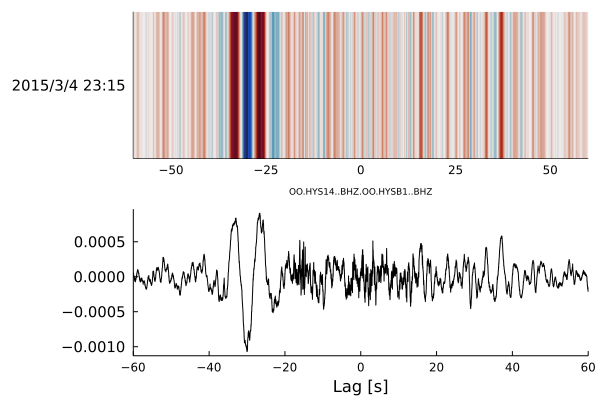

In [36]:
using SeisNoise, SeisIO, Plots
using Dates 
d=load_corr("/data/wsd01/corrdata/raw/OO.HYS14..BHZ.OO.HYSB1..BHZ.jld2","ZZ")
dailystk=stack(d,interval=Day(30))
allstk=stack(d,allstack=true)
plot(allstk)

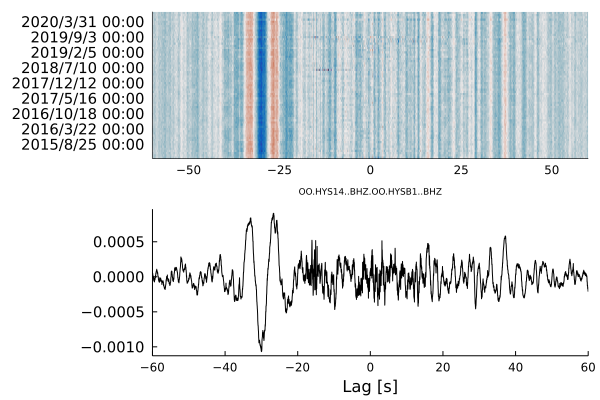

In [37]:
plot(dailystk)

### Resolving DV/V from Allstack and Daily Stack

In [49]:
using SeisDvv
fs=40.0     # sample frequency
win_len=10.0  # sliding window length
win_step=2.5 # sliding window step
j=67
dvt=zeros(j)
cct=zeros(j)

for i in 1:j#1890
    S1=Array(allstk.corr[:])
    S2=Array(dailystk.corr[:,i])
    tmin = 25.
    tmax = 30.
    window = collect(range(Int(floor(tmin*fs)),Int(floor(tmax*fs))))
    fmin = 0.1
    fmax = 0.2

    function evenly_spaced(a, b, n)
        h = (b-a)/(n-1)
        collect(a:h:b)
    end

    time=evenly_spaced(-60,60,4801)

    dvv_ts, cc_ts, cdp_Ts, eps_ts, err_ts, allC_ts = SeisDvv.stretching(S1, S2, time, window, fmin, fmax, dvmin=-0.02, dvmax=0.02, ntrial=100);
    dvt[i]=dvv_ts
    cct[i]=cc_ts
    
end

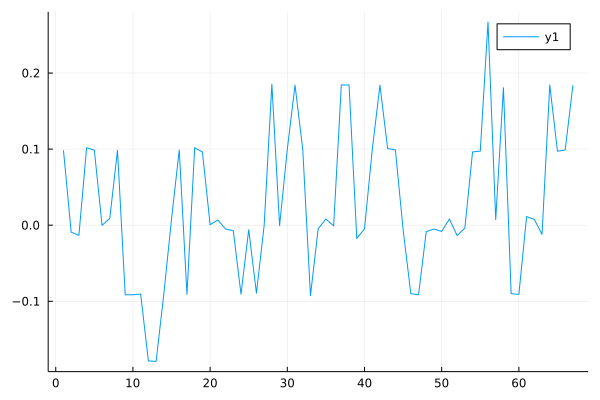

In [50]:
plot(dvt,seriestype = :line)

In [31]:
using MarketTechnicals
a=sma(dvt, 30)

1861×1 Matrix{Float64}:
 0.16403176723818008
 0.16402367023609507
 0.16402367023609507
 0.14932221345046992
 0.14103898031753745
 0.14368400099863027
 0.1556513700802278
 0.17036092386793789
 0.1795780112413379
 0.19438472905406776
 0.19718359277477518
 0.18237687496204527
 0.16751347813472062
 ⋮
 0.2922316012496374
 0.30145678562512235
 0.3312159672881116
 0.334014831008819
 0.3191352401773243
 0.3191433371794093
 0.3247329676187391
 0.3099424438101792
 0.30720025910406673
 0.30997483181851926
 0.32199078291262667
 0.30147297962929226

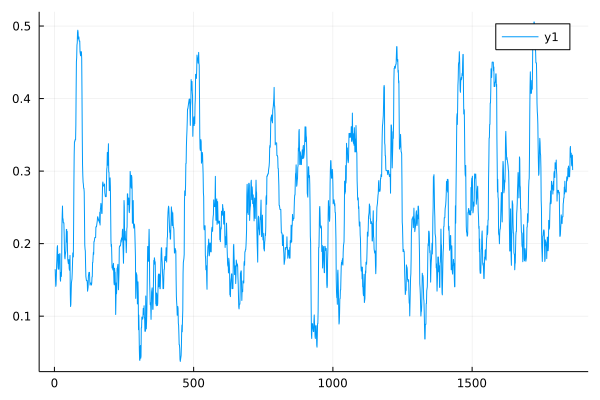

In [32]:
plot(a,seriestype = :line)

### terminal commands

htop
df
ls
cd
ls -lh


In [ ]:
function evenly_spaced(a, b, n)
    h = (b-a)/(n-1)
    collect(a:h:b)
end

time=evenly_spaced(-60,60,4801)


In [ ]:
j=2015
i=63
        if i<10
            a=string("/data/wsd01/OOI-Data/HYSB1/",string(j),"/00",string(i),"/HYSB1.OO.",string(j),".00",string(i),".SHZ")
            b=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/00",string(i),"/HYS14.OO.",string(j),".00",string(i),".SHZ")
        elseif i>=10 && i<100
            a=string("/data/wsd01/OOI-Data/HYSB1/",string(j),"/0",string(i),"/HYSB1.OO.",string(j),".0",string(i),".SHZ")
            b=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/0",string(i),"/HYS14.OO.",string(j),".0",string(i),".SHZ")
        elseif i>=100 && i<1000
            a=string("/data/wsd01/OOI-Data/HYSB1/",string(j),"/",string(i),"/HYSB1.OO.",string(j),".",string(i),".SHZ")
            b=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/",string(i),"/HYS14.OO.",string(j),".",string(i),".SHZ")
        end

S1=read_data(a)
S=read_data(b)
S.fs
fs/2

In [ ]:
merge!(S)
    ungap!(S)
	detrend!(S)         # remove mean & trend from channel
	taper!(S)                      # taper channel ends
	

In [ ]:
if fs ∉ S.fs
		filtfilt!(S,fh=Float64(fs/2),rt="Lowpass")    # lowpass filter before downsampling
	end
	resample!(S,fs=Float64(fs)) # downsample to lower fs
	taper!(S)

In [ ]:
fs ∉ S.fs

In [ ]:
filtfilt!(S,fh=Float64(18.0),rt="Lowpass")

In [ ]:
process_raw(S,40.)

In [ ]:
resample!(C,Float64(fs)) # downsample to lower fs
taper!(C)
phase_shift!(C, ϕshift=ϕshift) # timing offset from sampling period
return nothing